* Perceptron is single layer neural network
* Acts as linear classifier
* Loss Function- Binary Cross Entropy (-ve of Log likelihood)
* Optimization- Gradient Descent 

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generating Data

In [52]:
X,Y= make_blobs(
    n_samples=500,
    n_features=2,
    centers=2,
    random_state=10,
)

In [53]:
print(X.shape, Y.shape)

(500, 2) (500,)


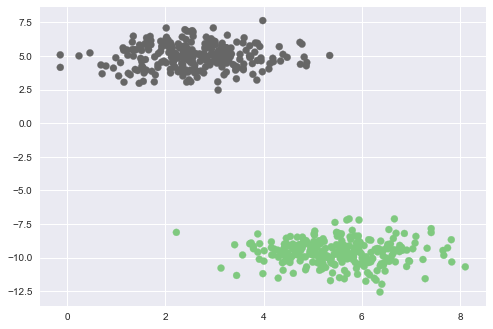

In [54]:
plt.style.use("seaborn")
plt.scatter(X[:,0], X[:,1],c=Y, cmap=plt.cm.Accent)
plt.show()

# Model and helper functions

In [55]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))
    

In [56]:
print(sigmoid(5))

#Broadcasting
z=np.array([1,2,3,4,5])
sigmoid(z)

0.9933071490757153


array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

## Implement Percceptron Learning Algorithm
- Learn the weights
- Reduce the loss
- Make predictions





In [68]:
def predict(X, weights):
    z= np.dot(X,weights)
    predictions=sigmoid(z)
    return predictions

"""X-> m x (n+1) matrix, w->(n x 1 vector)"""


def loss(X,Y,weights):
    #Binary Cross Entropy
    Y_ = predict(X, weights)
    cost=np.mean(-Y*np.log(Y_)- (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    """Perform updatefor one epoch"""
    Y_ = predict(X, weights)
    dw= np.dot(X.T, Y_ - Y)
    
    m= X.shape[0]
    weights= weights-learning_rate*dw/(float(m))
    return weights

def train(X,Y, learning_rate=0.5, maxEpochs=100):
    #Modify the input to handle the bias term
    ones=np.ones((X.shape[0],1))
    X= np.hstack((ones,X))
    
    #Initialize Weights 0
    
    weights=np.zeros(X.shape[1]) #n+1 entries
    
    #Iterate over few epochs and make update
    
    for epoch in range (maxEpochs):
        weights= update(X,Y,weights, learning_rate)
        
        if epoch%20==0:
            l= loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
            
    return weights

In [73]:
weights=train(X,Y,maxEpochs=1000)

Epoch 0 Loss 0.0006
Epoch 20 Loss 0.0005
Epoch 40 Loss 0.0005
Epoch 60 Loss 0.0004
Epoch 80 Loss 0.0004
Epoch 100 Loss 0.0004
Epoch 120 Loss 0.0003
Epoch 140 Loss 0.0003
Epoch 160 Loss 0.0003
Epoch 180 Loss 0.0003
Epoch 200 Loss 0.0003
Epoch 220 Loss 0.0002
Epoch 240 Loss 0.0002
Epoch 260 Loss 0.0002
Epoch 280 Loss 0.0002
Epoch 300 Loss 0.0002
Epoch 320 Loss 0.0002
Epoch 340 Loss 0.0002
Epoch 360 Loss 0.0002
Epoch 380 Loss 0.0002
Epoch 400 Loss 0.0002
Epoch 420 Loss 0.0002
Epoch 440 Loss 0.0002
Epoch 460 Loss 0.0002
Epoch 480 Loss 0.0001
Epoch 500 Loss 0.0001
Epoch 520 Loss 0.0001
Epoch 540 Loss 0.0001
Epoch 560 Loss 0.0001
Epoch 580 Loss 0.0001
Epoch 600 Loss 0.0001
Epoch 620 Loss 0.0001
Epoch 640 Loss 0.0001
Epoch 660 Loss 0.0001
Epoch 680 Loss 0.0001
Epoch 700 Loss 0.0001
Epoch 720 Loss 0.0001
Epoch 740 Loss 0.0001
Epoch 760 Loss 0.0001
Epoch 780 Loss 0.0001
Epoch 800 Loss 0.0001
Epoch 820 Loss 0.0001
Epoch 840 Loss 0.0001
Epoch 860 Loss 0.0001
Epoch 880 Loss 0.0001
Epoch 900 Loss 0

# Part-2

- Make Preedictions
- Visualise Decision Surface
- Linear vs Non-Linear classifications

In [92]:
def getPredictions(X_Test,weights, labels=True):
    if X_Test.shape[1]!= weights.shape[0]:
        ones= np.ones((X_Test.shape[0],1))
        X_Test=np.hstack((ones,X_Test))
        
    probs=predict(X_Test, weights)
    
    if not labels:
        return probs
    else:
        labels=np.zeros(probs.shape)
        labels[probs>=0.5]=1
        return labels
    
    
        


In [93]:
x1=np.linspace(-8,8,10)
print(x1)

x2=-(weights[0] + weights[1]*x1)/weights[2]


[-8.         -6.22222222 -4.44444444 -2.66666667 -0.88888889  0.88888889
  2.66666667  4.44444444  6.22222222  8.        ]


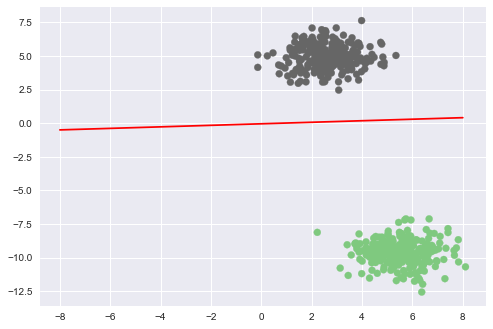

In [94]:
plt.style.use("seaborn")
plt.scatter(X[:,0], X[:,1],c=Y, cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [97]:
#Find the accuracy

Y_=getPredictions(X,weights, labels=True)
#print(Y_)
#print(Y)
#Y_==Y
training_acc=np.sum(Y_==Y)/Y.shape[0]
print(training_acc)



1.0
